# HW2

## a)

In [105]:
import numpy as np

In [83]:
def g(t, y, theta, x0=2):
    x = np.sin(theta * t) + x0
    return ((y - x)**2).sum()

In [84]:
def first_deriv_g(t, y, theta, x0=2):
    return (- 2 * (y - np.sin(theta * t) - x0) * np.cos(theta * t) * t).sum()

In [85]:
def second_deriv_g(t, y, theta, x0=2):
    return ( 2 * (y - np.sin(theta * t) - x0) * np.sin(theta * t) * (t**2) + 2 * (np.cos(theta * t)**2) * (t ** 2)).sum()

In [86]:
def theta_step(t, y, theta, x0=2):
    delta_theta = - first_deriv_g(t, y, theta, x0=2)/second_deriv_g(t, y, theta, x0=2)
    theta += delta_theta
    return theta

In [87]:
def run_newton_method(t, y, theta, x0=2, n_max=30, eps=10**(-8)):
    save(theta, how='w')
    for i in range(n_max):
        theta_new = theta_step(t, y, theta, x0=2)
        if abs(theta_new - theta) < eps:
            theta = theta_new
            break
        else:
            theta = theta_new
        save(theta, how='a')
    return theta

In [91]:
def save(x, how='a', name='Exc7Task2a.txt'):
    with open(name, how) as f:
        f.write('%.3f\n' % x)

In [92]:
n_max = 30
eps = 10**(-8)
theta = 3
data = np.loadtxt('Data.txt', ndmin=2, converters = float,delimiter=",")

In [90]:
run_newton_method(data[:, 0], data[:, 1], theta, x0=2, n_max=n_max, eps=eps)

np.float64(2.70211998201272)

## b)

In [106]:
import matplotlib.pyplot as plt

In [107]:
thetas = np.linspace(0, 20, 100)

In [108]:
val = [g(data[:, 0], data[:, 1], theta, x0=2).item() for theta in thetas]
der1 = [first_deriv_g(data[:, 0], data[:, 1], theta, x0=2).item() for theta in thetas]
der2 = [second_deriv_g(data[:, 0], data[:, 1], theta, x0=2).item() for theta in thetas]

In [124]:
index = np.argmin(val)

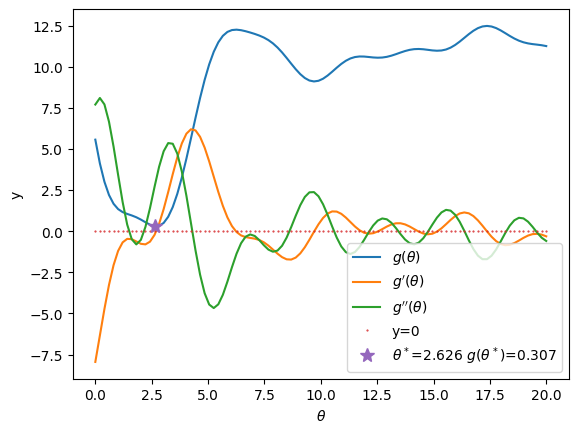

In [146]:
plt.plot(thetas, val, label=r'$g(\theta)$')
plt.plot(thetas, der1, label=r'$g^{\prime}(\theta)$')
plt.plot(thetas, der2, label=r'$g^{\prime \prime}(\theta)$')
plt.plot(thetas, [0]*len(thetas), '.', label='y=0', markersize=1)
plt.plot(thetas[index], val[index], '*', label=r'$\theta^*$=%.3f $g(\theta^*)$=%.3f' % (thetas[index], val[index]), markersize=10)
plt.xlabel(r'$\theta$')
plt.ylabel('y')
plt.legend()

## c)

In [149]:
def model(t, theta, x0=2):
    return np.sin(theta * t) + x0

In [151]:
data = np.loadtxt('Data.txt', ndmin=2, converters = float,delimiter=",")
pred = model(data[:, 0], thetas[index])

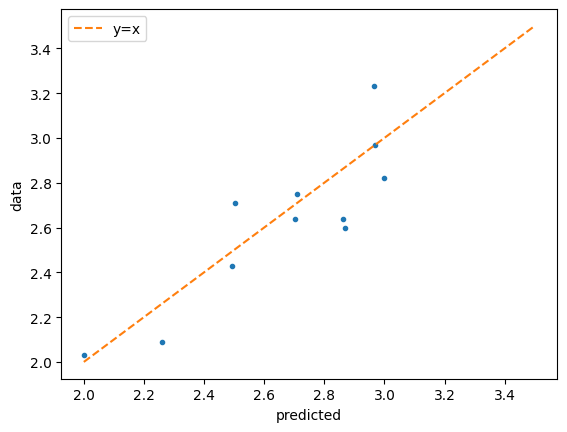

In [163]:
plt.plot(pred, data[:, 1], '.')
plt.plot(np.linspace(2, 3.5, 10), np.linspace(2, 3.5, 10), '--', label='y=x')
plt.xlabel('predicted')
plt.ylabel('data')
plt.legend()

According to the comparison, it seems that the Newton method is not guaranteed to provide the global optimal
parameter as the result from the Newton method function differ from the parameter corresponding to the global minumum value:

In [165]:
result = run_newton_method(data[:, 0], data[:, 1], theta, x0=2, n_max=n_max, eps=eps).item()

In [175]:
print('Newton method: %f\nGlobal minimum value parameter for the objective function: %f' % (result, thetas[index]))

Newton method: 2.702120
Global minimum value parameter for the objective function: 2.626263


Additionally, it is important to correctly initialize the Newton method function, otherwise it would give the parameter associated with the local, not global minimum.

In [178]:
theta_start = 10
run_newton_method(data[:, 0], data[:, 1], theta_start, x0=2, n_max=n_max, eps=eps).item()

9.711984372034813